<a href="https://colab.research.google.com/github/MatchLab-Imperial/machine-learning-course/blob/main/ML_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

Clustering is considered one of the unsupervised machine learning algorithms. Hence, it does not require labels
set for performing classification problems. Hierarchical and K-means clustering are one of the commonly used clustering
algorithms. Hierarchical clustering methods are either agglomerative, in which the algorithm starts with the leaves
and merge the clusters together, or divisive, in which the algorithm starts with the root and gradually split the clusters. The linkage criterion is the deciding factor of which hierarchical clustering method should be used, which is a function of the
pairwise distances between observations. K-means clustering defines a K number of points (also known as centers or centroids)
that indicates the number of groups which is established a priori by expert or decided using elbow plot. These centers are initialised randomly within the dataset, in which the algorithm tries to assign the K centers to the nearest neighbor of datasets in order to group the near datasets into one cluster. To calculate the degree of homogeneity and heterogeneity, the K-means clustering method employs the Euclidean distance as a measure of the similarity between observations and groups. The heart of this algorithm is the "looping" which keep updating the centers’ positions until an optimal position of the center is reached.

In this tutorial, we will use K-means clustering to classify the features of the iris-dataset without considering the labels. Remember from the lecture notes that our goal is to minimise the score function:
\begin{equation}
J(\mathcal{C})=\sum_{i=1}^{k} \sum_{x_j\in \mathcal{C}_i}^{} \|x_j - \mu_i \|^2
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

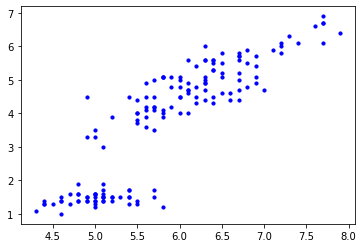

In [ ]:
# Here we use the two features sepal length and pertal length
x = iris_data.iloc[:, [0,2]]

# Uncomment the below code for using sepal width and petal width instead
#x = iris_data.iloc[:, [1,3]]

X= x.to_numpy()
plt.scatter(X[:,0], X[:,1], color='b', s=10)
plt.show()

In [ ]:
def distance_centers(X,centers):
    """
    Estimating the distance between each data point and the centers using Eulidean distance
    Return the distances and vector that represents class of each data point
    """
    distance = np.array([ np.sum((X-center)**2,axis=1) for center in centers ])
    label = distance.argmin(axis=0)
    return distance, label

In [ ]:
def update_centers(X,labels,k):
    """
    Updating the newly formed centers.
    Reurn the new center value
    """
    new_center = np.array([ X[labels == i ].mean(axis=0) for i in range(k)])
    return new_center

In [ ]:
def stopping_condition(old_centers,new_centers,current_iter,max_iters):
    """
    If centers are no longer converging or max_iteration is reached stop the algorithm
    """
    if current_iter > max_iters: return True
    return (old_centers == new_centers).all()

In [ ]:
def plot_centers(X, centers, labels):
    plt.scatter(X[:,0], X[:,1], s=7, c=labels)
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=100, label='Cluster centers');
    plt.legend()
    plt.show()

In [ ]:
def fit(X,k,max_iters,show_plots):
    """
    Main function that applies Kmeans
    """
    # Intialise centers with random values
    np.random.seed(90)
    centers = X[np.random.choice(X.shape[0], k), :]
    
    labels = old_centers = None
    iteration = 1
    # Plot intialised centers
    if show_plots == True:
        print('Intialise cluster centers:\n', centers)
        plot_centers(X, centers, labels)
    
    while not stopping_condition(old_centers,centers,iteration,max_iters):
        distance, labels = distance_centers(X,centers)
        old_centers = centers
        centers = update_centers(X,labels,k)
         # Plot updated centers
        if show_plots == True:
            print('Updated cluster centers:\n', centers)
            plot_centers(X, centers, labels)
        iteration += 1
    # calculate the sum of squared errors (SSE) for Elbow method
    SSE = (np.min(distance, axis=0)**2).sum()
    return centers, labels, SSE

Intialise cluster centers:
 [[6.1 4.6]
 [5.8 5.1]
 [5.8 4.1]]


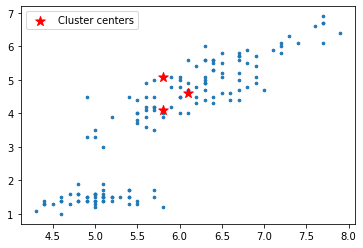

Updated cluster centers:
 [[6.3875     4.725     ]
 [6.64878049 5.68292683]
 [5.18831169 2.33116883]]


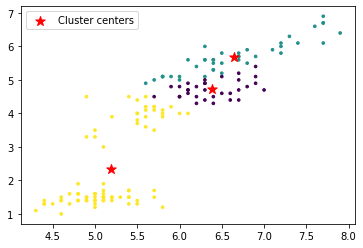

Updated cluster centers:
 [[6.02       4.54      ]
 [6.87352941 5.82352941]
 [5.02857143 1.66607143]]


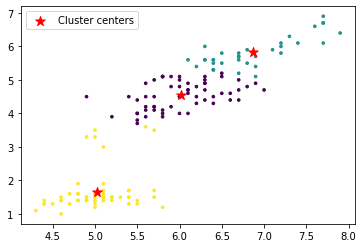

Updated cluster centers:
 [[5.95322581 4.45483871]
 [6.86388889 5.78055556]
 [5.00576923 1.52692308]]


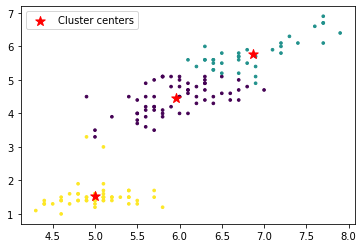

Updated cluster centers:
 [[5.9147541  4.41639344]
 [6.85       5.74210526]
 [5.00784314 1.49215686]]


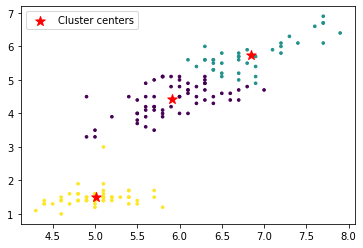

Updated cluster centers:
 [[5.88135593 4.40508475]
 [6.8525     5.6925    ]
 [5.00784314 1.49215686]]


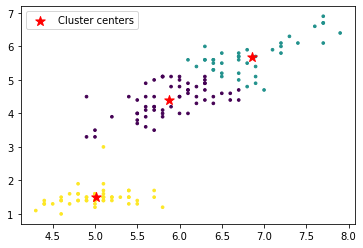

In [ ]:
k = 3
show=True
max_iters=5
centers,labels, _ = fit(X,k,max_iters,show)

Since Iris-dataset is labelled according to three classes (i.e. Setosa, Virginica and Versicolor), we know in fact that the optimum $k$ (number of centers) should be three as demonstrated in the code above. However, we usually implement unsupervised learning on unlabelled data, which make it difficult to guess the value of $k$. Elbow method can be considered a systematic method to estimate the value of $k$. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 8 in the examples above), and for each value of k calculate the sum of squared errors (SSE) as shown in the below cell. Hence, it is not guaranteed that the elbow method will choose the optimum value of $k$, but at least it gives an intuition of an approximate value. For example, if we applied the elbow method on the Iris-dataset, we can see the curve rapidly tapers off after $k=3$ which is our optimum $k$. But according to the same curve, choosing a value $k=2$ is still acceptable. 

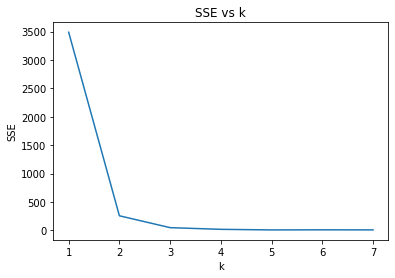

In [ ]:
ks = np.arange(1,8)
sse_arr = []
show=False
for k in ks:
    _, _, sse = fit(X, k, max_iters, show)
    sse_arr.append(sse)
plt.plot(ks,sse_arr)
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE vs k')
plt.show()

## Task 1:

- Since you have already the labels of this dataset. Estimate the error of your predictions using K-means clustering.
- Hint: the labels provided from the K-means clustering may differ from the original dataset, so you should use the features a reference and either change the labels of the algorithm or the dataset.

## Task 2:
- Use scikitlearn package to do the same steps as in the original tutorial and compare the results achieved. You may refer to the following link:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

## Task 3:
- Write a code using agglomerative hierarchical clustering for the same dataset and estimate the error of your predictions. (You can use scikitlearn package for this task)